100%|██████████| 74/74 [00:01<00:00, 70.97it/s]


Epoch 1/20
83/83 [==============================] - 1624s 20s/step - loss: 3.2921 - accuracy: 0.3080 - val_loss: 1.3685 - val_accuracy: 0.2789
Epoch 2/20
83/83 [==============================] - 1594s 19s/step - loss: 1.2914 - accuracy: 0.3939 - val_loss: 1.1762 - val_accuracy: 0.4694
Epoch 3/20
83/83 [==============================] - 1641s 20s/step - loss: 1.1586 - accuracy: 0.4941 - val_loss: 1.0502 - val_accuracy: 0.5170
Epoch 4/20
39/83 [=============>................] - ETA: 13:30 - loss: 1.0536 - accuracy: 0.5353

KeyboardInterrupt: ignored

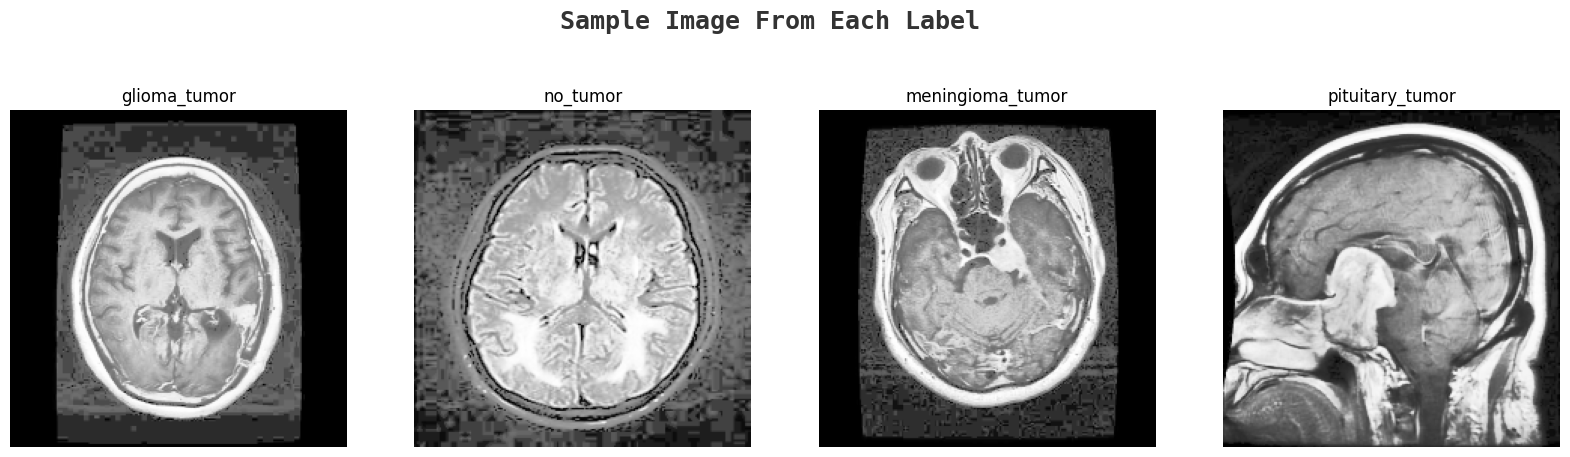

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings


def hist_normalization(img):

    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    cv2.waitKey(0)
    return img_output


labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/brain_tumor_data/biomedical_data_brain_tumor','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = hist_normalization(img)
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/brain_tumor_data/biomedical_data_brain_tumor','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img2 = hist_normalization(img)
        img = cv2.resize(img2,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        


        
X_train = np.array(X_train)
y_train = np.array(y_train)
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1
X_train, y_train = shuffle(X_train,y_train, random_state=101)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=20,validation_split=0.1)
model.save('/content/drive/MyDrive/BM_CNN-model.h5')


pred1 = model.predict(X_test)

pred = np.argmax(pred1,axis=1)

y_test_new = np.argmax(y_test,axis=1)


confusion_mtx = confusion_matrix(y_test_new, pred) 

f,ax = plt.subplots(figsize=(8, 8))

sns.heatmap(confusion_mtx, annot = True, linewidths = 0.01,cmap = "Oranges" , linecolor="gray", fmt= '.1f',ax=ax)

plt.xlabel("Predicted Label")

plt.ylabel("True Label")

plt.title("Confusion Matrix")

plt.show()

accuracy = (y_test_new == pred).sum() / float(len(y_test)) * 100

print("Test File accuracy is: ",accuracy)

In [24]:
import os
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
def hist_normalization(img):

    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    cv2.waitKey(0)
    return img_output


def task3():
  image_size=224
  MODEL_PATH = '/content/drive/MyDrive/BM_CNN-model.h5'
  CNN = keras.models.load_model(MODEL_PATH)
  X_train=[]
  fy_train=[]

  z=1
  print()
  folderPath = os.path.join('/content/drive/MyDrive/brain_tumor_data/biomedical_data_brain_tumor/test fiel','testing')
  print()
  for j in tqdm(os.listdir(folderPath)):
    img = cv2.imread(os.path.join(folderPath,j))
    print(z,":",j)
    z=z+1
    img2 = hist_normalization(img)
    img = cv2.resize(img2,(image_size, image_size))
    fy_train.append(img)

#fy_train = np.array(fy_train) 
#pred1 = model.predict(fy_train) 
#pred = np.argmax(pred1,axis=1)

#print("Test File accuracy is: ",pred)
  print("eNter Number of image:  ")
  image_NUmber = input() 
  if image_NUmber=="1":
    fy_train = np.array(fy_train) 
    fy=np.expand_dims(fy_train[0],axis=0)
    pred1 = CNN.predict(fy) 
    pred = np.argmax(pred1,axis=1)
    print("Test File accuracy is: ",pred)
  elif image_NUmber=="2": 
    fy_train = np.array(fy_train) 
    fy=np.expand_dims(fy_train[1],axis=0)
    pred1 = CNN.predict(fy) 
    pred = np.argmax(pred1,axis=1)

    print("Test File accuracy is: ",pred)
  elif image_NUmber=="3": 
    fy_train = np.array(fy_train) 
    fy=np.expand_dims(fy_train[2],axis=0)
    pred1 = CNN.predict(fy) 
    pred = np.argmax(pred1,axis=1)

    print("Test File accuracy is: ",pred)
  elif image_NUmber=="4": 
    fy_train = np.array(fy_train) 
    fy=np.expand_dims(fy_train[3],axis=0)
    pred1 = CNN.predict(fy) 
    pred = np.argmax(pred1,axis=1)

    print("Test File accuracy is: ",pred)
  elif image_NUmber=="5": 
    fy_train = np.array(fy_train) 
    fy=np.expand_dims(fy_train[4],axis=0)
    pred1 = CNN.predict(fy) 
    pred = np.argmax(pred1,axis=1)

    print("Test File accuracy is: ",pred) 
  elif image_NUmber=="6": 
    fy_train = np.array(fy_train) 
    fy=np.expand_dims(fy_train[5],axis=0)
    pred1 = CNN.predict(fy) 
    pred = np.argmax(pred1,axis=1)

    print("Test File accuracy is: ",pred)
  elif image_NUmber=="7": 
    fy_train = np.array(fy_train) 
    fy=np.expand_dims(fy_train[6],axis=0)
    pred1 = CNN.predict(fy) 
    pred = np.argmax(pred1,axis=1)

    print("Test File accuracy is: ",pred)
  elif image_NUmber=="8": 
    fy_train = np.array(fy_train) 
    fy=np.expand_dims(fy_train[7],axis=0)
    pred1 = CNN.predict(fy) 
    pred = np.argmax(pred1,axis=1)
    print("Test File accuracy is: ",pred) 
  else:
    print("pred") 
  labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']    
  if pred==0:
    print("The class is:glioma_tumor ")
  elif pred==1:
    print("The class is:no_tumor ")
  elif pred==2:
    print("The class is:meningioma_tumor ")  
  else: 
    print("The class is:pituitary_tumor ")   

 enter the number of the task you want to do : 
 if you want to stop the program enter S 
2
enter the number of the operation you want to do : 
a. Enhance your medical image by applying appropriatemorphological operations (draw the histogram before and after the operation, write your conclusion -at least 4 operations).
b. Apply your own filter & mask for feature detection.
c. Extract and segment object of interest (ex. Tumor) from your medical image. 
d. Measure how big the object of interest is, measure distance transformation, center mass of the object of interest.
a
1:hand image 2:leg image
2
Data type: uint8
Min. value: 0
Max value: 255


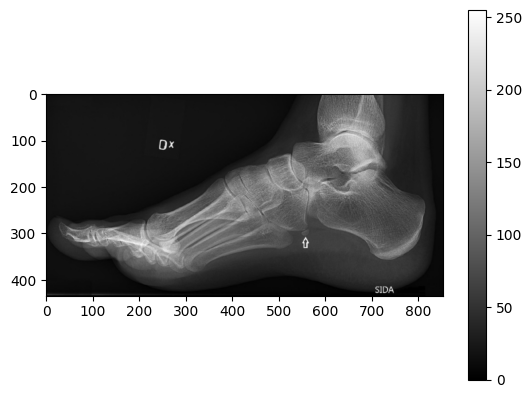

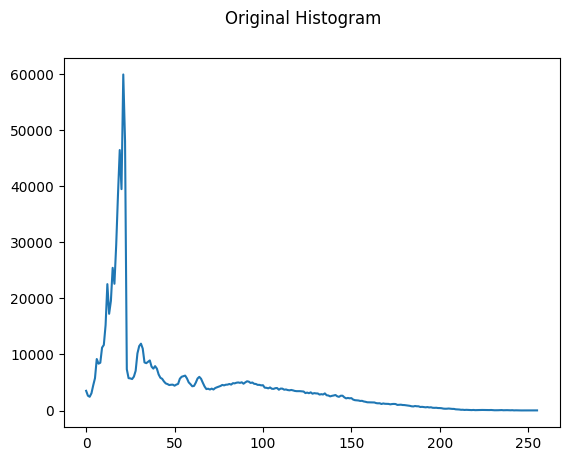

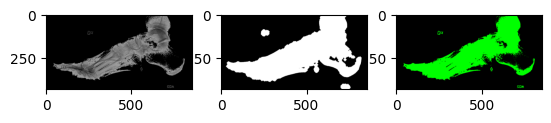

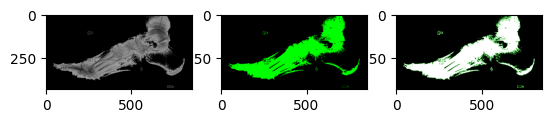

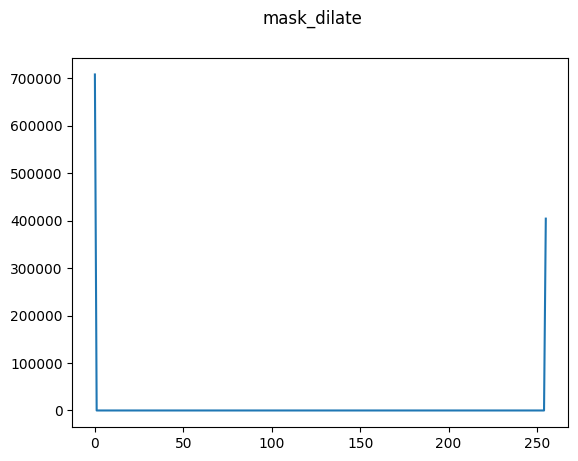

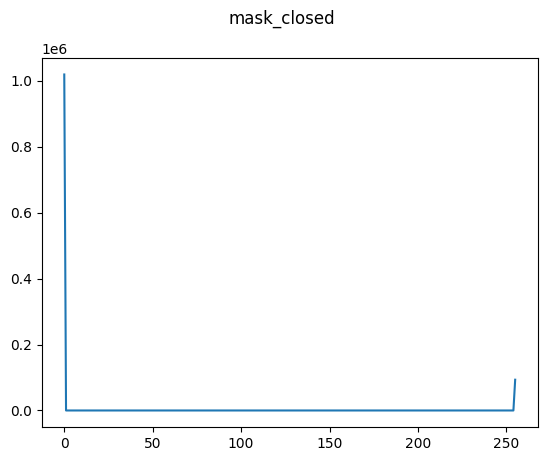

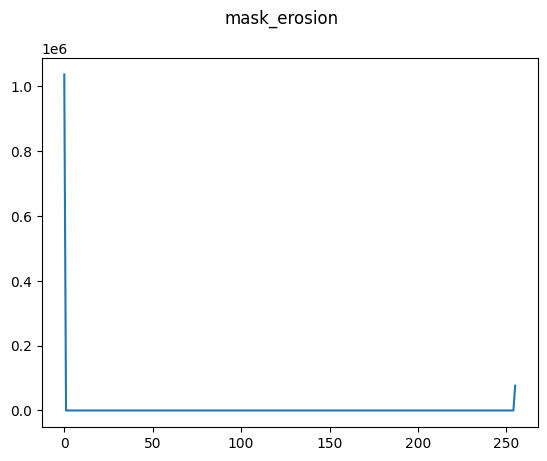

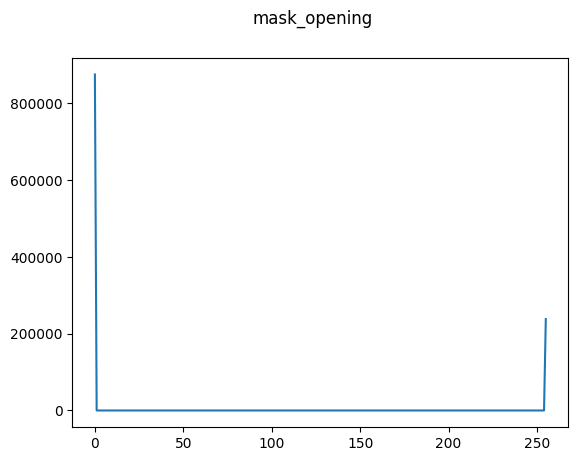

 enter the number of the task you want to do : 
 if you want to stop the program enter S 
2
enter the number of the operation you want to do : 
a. Enhance your medical image by applying appropriatemorphological operations (draw the histogram before and after the operation, write your conclusion -at least 4 operations).
b. Apply your own filter & mask for feature detection.
c. Extract and segment object of interest (ex. Tumor) from your medical image. 
d. Measure how big the object of interest is, measure distance transformation, center mass of the object of interest.
a
1:hand image 2:leg image
1
Data type: uint8
Min. value: 0
Max value: 255


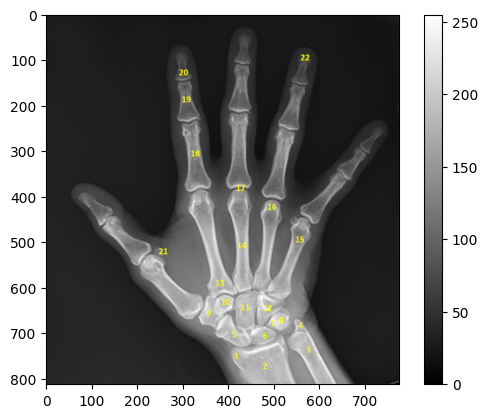

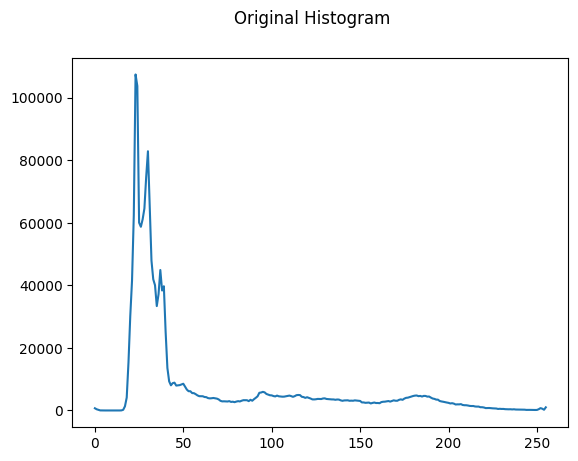

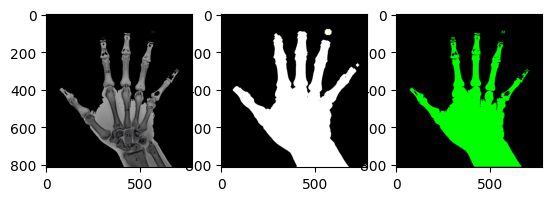

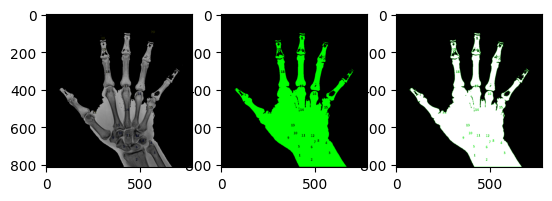

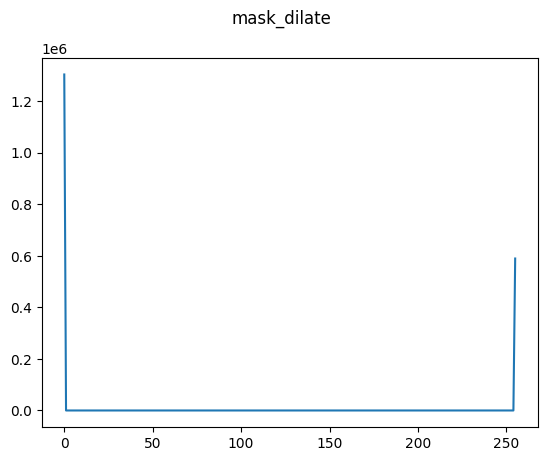

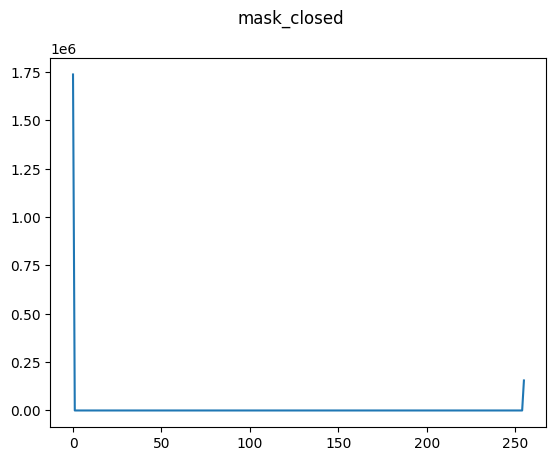

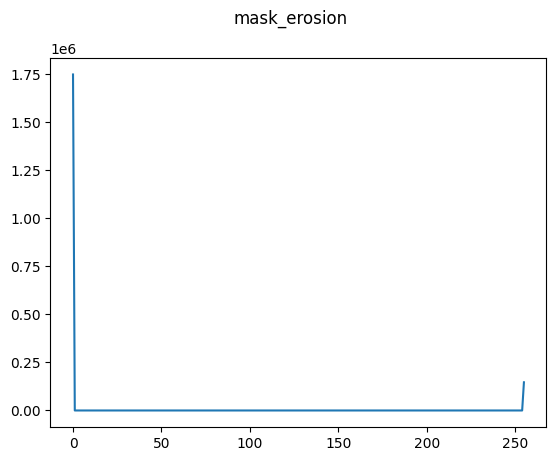

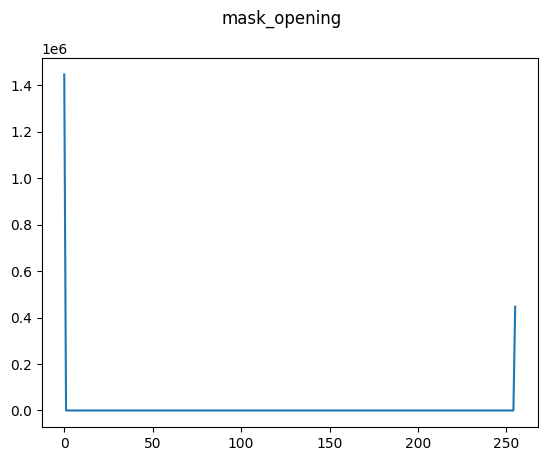

 enter the number of the task you want to do : 
 if you want to stop the program enter S 
2
enter the number of the operation you want to do : 
a. Enhance your medical image by applying appropriatemorphological operations (draw the histogram before and after the operation, write your conclusion -at least 4 operations).
b. Apply your own filter & mask for feature detection.
c. Extract and segment object of interest (ex. Tumor) from your medical image. 
d. Measure how big the object of interest is, measure distance transformation, center mass of the object of interest.
b
1:hand image 2:leg image
1


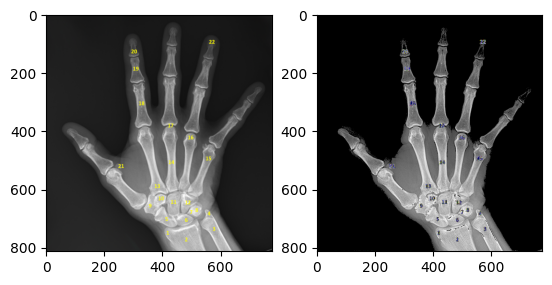

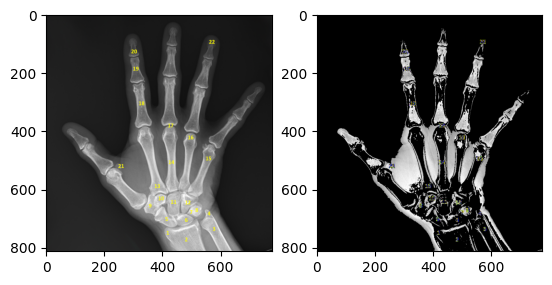

 enter the number of the task you want to do : 
 if you want to stop the program enter S 
2
enter the number of the operation you want to do : 
a. Enhance your medical image by applying appropriatemorphological operations (draw the histogram before and after the operation, write your conclusion -at least 4 operations).
b. Apply your own filter & mask for feature detection.
c. Extract and segment object of interest (ex. Tumor) from your medical image. 
d. Measure how big the object of interest is, measure distance transformation, center mass of the object of interest.
b
1:hand image 2:leg image
2


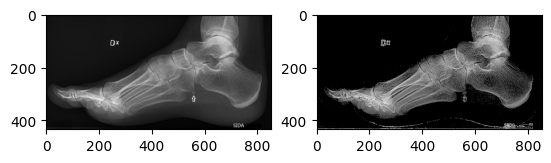

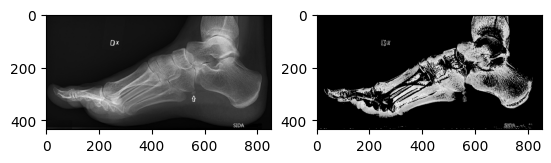

 enter the number of the task you want to do : 
 if you want to stop the program enter S 
3




100%|██████████| 8/8 [00:00<00:00, 99.68it/s]


1 : gg (2).jpg
2 : gg (13).jpg
3 : m (3).jpg
4 : m (14).jpg
5 : no_tumor2.jpg
6 : p (25).jpg
7 : p (36).jpg
8 : no_Tumor.jpg
eNter Number of image:  
8


1/1 [==============================] - 0s 336ms/step
Test File accuracy is:  [1]
The class is:no_tumor 
 enter the number of the task you want to do : 
 if you want to stop the program enter S 
1
Reading DICOM (examining files): 1/226 files (0.4%)5/226 files (2.2%)46/226 files (20.4%)88/226 files (38.9%)128/226 files (56.6%)163/226 files (72.1%)196/226 files (86.7%)226/226 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 16/226  (7.1%)47/226  (20.8%)75/226  (33.2%)100/226  (44.2%)129/226  (57.1%)152/226  (67.3%)181/226  (80.1%)208/226  (92.0%)226/226  (100.0%)
Patient Name:  Doe^Pierre
Patient ID:  54879843
Patient Birthdate:  
Patient Sex:  M 
Image Position:  (-125.0, -134.8, -8.75)
Image Orientation:  (

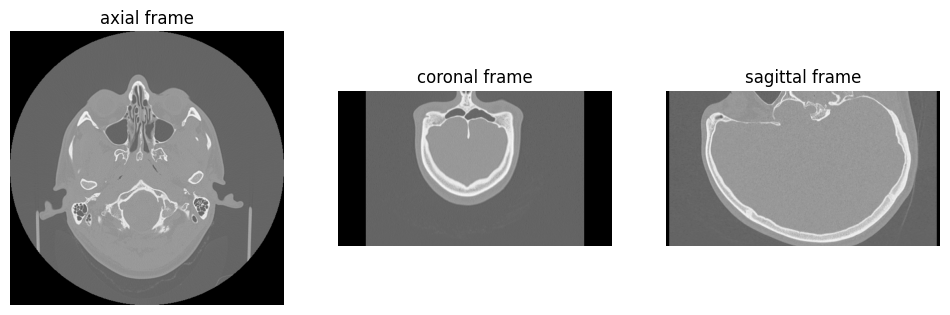

 enter the number of the task you want to do : 
 if you want to stop the program enter S 
s


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

#Regarding point 1 and it's requirements =>
#Read the dataset of brain folder using imageio.volread() function

# make a loop to make user enter the required task number 

# 1.Provided dicom images, be able to :
# 1.1. Get patient information and Image information.
# 1.2.Get Shape, Sampling, Pixel Aspect ratio and field of viewof the images used. 
# 1.3.Slice the image to view from different planes(Explore medical image)

# Carry out image Analysis Operations :
# 2.1.Enhance your medical image by applying appropriatemorphological operations (draw the histogram before and after the operation, write your conclusion -at least 4 operations).
# 2.2. Apply your own filter & mask for feature detection.
# 2.3. Extract and segment object of interest (ex. Tumor) from your medical image. 
# 2.4. Measure how big the object of interest is, measure distance transformation, center mass of the object of interest.
def task_one():
        # 1.Provided dicom images, be able to :
        # 1.1. Get patient information and Image information.
        # 1.2.Get Shape, Sampling, Pixel Aspect ratio and field of viewof the images used. 
        # 1.3.Slice the image to view from different planes(Explore medical image)
        #Read the dataset of brain folder using imageio.volread() function
        vol = imageio.volread("/content/drive/MyDrive/brain_tumor_data/Cranial CT", format='dicom')

        
        #Get patient information
        print("Patient Name: ", vol.meta['PatientName'])
        print("Patient ID: ", vol.meta['PatientID'])
        print("Patient Birthdate: ", vol.meta['PatientBirthDate'])
        print("Patient Sex: ", vol.meta['PatientSex'])
        


        #Get image information
        print("Image Position: ", vol.meta['ImagePositionPatient'])
        print("Image Orientation: ", vol.meta['ImageOrientationPatient'])

        #Print the  number of slices of each plane.
        n0, n1, n2 = vol.shape
        print("the shape is: ", vol.shape, "\n")

        print("Number of Slices:\n\t", "Axial=", n0, "Slices\n\t",
                                    "Coronal=", n1, "Slices\n\t",
                                    "Sagittal=", n2, "Slices")

        # Print the sampling rate of each plane, you can find it in the metadata using 'sampling' as a keyword.
        d0, d1, d2 = vol.meta['sampling']

        print("Sampling Rate Axial", d0, "\nSampling Rate Coronal", d1 , "\nSampling Rate Sagittal",d2)

        #Print the field of view of each plane by multiplying the number of slides and the sampling rate.
        print("FoV Axial", d0*n0, "\nFoV Coronal", d1*n1 , "\nFoV Sagittal",d2*n2)

        #Calculate the ascpect ratio of each plane and save each in a separate variable.

        axial_asp = d1/d2
        sagittal_asp = d0/d1
        coronal_asp = d0/d2

        print("Axial Aspect Ratio", axial_asp, "\nCoronal Aspect Ratio", coronal_asp , "\nSagittal Aspect Ratio",sagittal_asp)
        # Define the function that shows the images of the specified slice number.
        def slicer(axial_slice, coronal_slice, sagittal_slice):
            #call the subplots function to create a subplot of 1 row and 3 cols

            fig, ax = plt.subplots(1, 3, figsize=(12, 12))

            # Show the specfied slice on the axial plane "first index" with 'gray' color-map
            # make sure to turn the axis off and specify an appropriate title

            ax[0].imshow(vol[axial_slice,:,:], cmap='gray', aspect= axial_asp)
            ax[0].axis('off')
            ax[0].set_title('axial frame')
            # Show the specfied slice on the coronal plane "second index" with 'gray' color-map
            # make sure to turn the axis off and specify an appropriate title

            ax[1].imshow(vol[:, coronal_slice, :], cmap='gray', aspect=coronal_asp)
            ax[1].axis('off')
            ax[1].set_title('coronal frame')

            # Show the specfied slice on the sagittal plane "third index" with 'gray' color-map
            # make sure to turn the axis off and specify an appropriate title

            ax[2].imshow(vol[:,:, sagittal_slice], cmap='gray', aspect= sagittal_asp)
            ax[2].axis('off')
            ax[2].set_title('sagittal frame')

            #Render the images
            plt.show()

        slicer(5, 100, 200)    

def EnhanceImage(im):
            print('Data type:', im.dtype)   #attribute
            print('Min. value:', im.min())
            print('Max value:', im.max())
            plt.imshow(im, cmap='gray', vmin=0, vmax=255)
            #Show the color bar and render the plot
            plt.colorbar()
            plt.show()
            mask_bon2=np.where(im > 90,im,0)#bone mask 
            
            
            # Import SciPy's "ndimage" module
            import scipy.ndimage as ndi

            # Create a histogram, binned at each possible value
            hist = ndi.histogram(im, min=0, max=255, bins=256)
            plt.plot(hist)
            plt.suptitle("Original Histogram")
            plt.show()
            # mask to be true for values more than 70 (for bones only)
            

            #Apply 4 morphological operations which are (dilation, erosion, opening and closing).
            #Tuning : Apply the ndi.binary_dilation function with 10 iterations on mask 2 (bones).
            mask_dilate=ndi.binary_dilation(mask_bon2,iterations=10).astype(mask_bon2.dtype)
            mask_closed=ndi.binary_closing(mask_bon2,iterations=1)

            fig, axes = plt.subplots(1, 3)
            axes[0].imshow(mask_bon2*255)
            axes[1].imshow(mask_dilate*255)
            axes[2].imshow(mask_closed*255)
            plt.show()
            mask_erosion=ndi.binary_erosion(mask_bon2,iterations=1)

            mask_opening=ndi.binary_opening(mask_bon2,iterations=1)
            fig, axes = plt.subplots(1, 3)
            axes[0].imshow(mask_bon2*255)
            axes[1].imshow(mask_erosion*255)
            axes[2].imshow(mask_opening*255)
            plt.show()
            hist1=ndi.histogram(mask_dilate*255,min=0,max=255,bins=256)
            plt.plot(hist1)
            plt.suptitle("mask_dilate")
            plt.show()

            hist2=ndi.histogram(mask_closed*255,min=0,max=255,bins=256)
            plt.plot(hist2)
            plt.suptitle("mask_closed")
            plt.show()

            hist3=ndi.histogram(mask_erosion*255,min=0,max=255,bins=256)
            plt.plot(hist3)
            plt.suptitle("mask_erosion")
            plt.show()

            hist4=ndi.histogram(mask_opening*255,min=0,max=255,bins=256)
            plt.plot(hist4)
            plt.suptitle("mask_opening")
            plt.show()

def ApplyFilter(im):
  # Set weights to detect vertical edges
  #sharping filter
  weights = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]).reshape((3, 3, 1))
  # Convolve "im" with filter weights
  edges = ndi.convolve(im, weights)

  edges=np.where(edges > 70,edges,0)

  # Draw the image in color
  plt.show()
  fig, axes = plt.subplots(1, 2)
  axes[0].imshow(im)
  axes[1].imshow(edges)
  plt.show()
  #feature detection
  weights = np.array([[+1, 0, -1], [+1, 0, 1], [+1, 0, -1]]).reshape((3, 3, 1))
  # Convolve "im" with filter weights
  edges = ndi.convolve(im, weights)
  edges=np.where(edges > 150,edges,0)#150 to detect bone

  # Draw the image in color
  plt.show()
  fig, axes = plt.subplots(1, 2)
  axes[0].imshow(im)
  axes[1].imshow(edges)
  plt.show()
  

def ExtractSegment(im):
  print('data type',im.dtype)
  print('min',im.min())
  print('.ax',im.max()) 

  plt.imshow(im,cmap='gray',vmin=0,vmax=255)
  plt.colorbar()
  plt.show()
  im_filt= ndi.median_filter(im, size=3)
  mask_start= np.where(im_filt >60, 1, 0)
  mask = ndi.binary_closing(mask_start)
  labels, nlabels= ndi.label(mask)
  print('Num. Labels:',nlabels)
  overlay = np.where(labels>0, labels, np.nan)
  plt.imshow(overlay, cmap='rainbow')
  plt.axis('off')
  plt.show()


  bboxes= ndi.find_objects(labels == 5)
  print('Number of objects:', len(bboxes))
  print('Indices for first box:', bboxes[0])
  # Crop to the left ventricle (index 0)im_lv= im[bboxes[0]]
  # Plot the cropped imageplt.ims
  im_lv=im[bboxes[0]]
  plt.imshow(im_lv)
            


def MeasureObject(im):
  d1, d2 = im.meta['sampling']
  dpixels= d1 * d2
  im_filt= ndi.median_filter(im, size=3)
  mask_start= np.where(im_filt >60, 1, 0)
  mask = ndi.binary_closing(mask_start)
  labels, nlabels= ndi.label(mask)
  # Count label pixels
  npixels=ndi.sum(1, labels, index=5)
  # Calculate volume of label
  area= npixels* dpixels
  print('how big object of interest:',area)

  mask=np.where(labels == 5, 1, 0)
  # In terms of voxels
  d=ndi.distance_transform_edt(mask)
  print("d max",d.max())

  # In terms of space
  lv = np.where(labels == 5, 1, 0)
  dists= ndi.distance_transform_edt(lv, sampling = im.meta['sampling'])
  # Report on distances
  print('Max distance (mm):', ndi.maximum(dists))
  print('Max location:', ndi.maximum_position(dists))

  coms = ndi.center_of_mass(im,labels, index=5)
  print('Label 1 center:', coms)

import time


while True :
    print(" enter the number of the task you want to do : ")
    print(" if you want to stop the program enter S ")
    task = input()
    if task == "1" :
        task_one()
        
        time.sleep(5)

    elif task == "2" :
            print("enter the number of the operation you want to do : ")
            print("a. Enhance your medical image by applying appropriatemorphological operations (draw the histogram before and after the operation, write your conclusion -at least 4 operations).")
            print("b. Apply your own filter & mask for feature detection.")
            print("c. Extract and segment object of interest (ex. Tumor) from your medical image. ")
            print("d. Measure how big the object of interest is, measure distance transformation, center mass of the object of interest.")

            operation = input()
            im = imageio.imread("/content/hands.jpeg")
            im2=imageio.imread("SCD2001_MR_117.dcm")
            if operation == "a" :
                print("1:hand image 2:leg image")
                image_number=input()
                if image_number=='1':
                  im = imageio.imread("/content/hands.jpeg")
                else:
                    im = imageio.imread("/content/legs.jpeg")
                EnhanceImage(im)
            elif operation == "b" :
                print("1:hand image 2:leg image")
                image_number=input()
                if image_number=='1':
                  im = imageio.imread("/content/hands.jpeg")
                else:
                    im = imageio.imread("/content/legs.jpeg")
                ApplyFilter(im)
            elif operation == "c" :
                ExtractSegment(im2)
            elif operation == "d" :
                MeasureObject(im2)
    elif task=="3":
      task3()        
    elif task == 's':
        break
    else:
        print("Invalid input. Please try again.")    
